In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =9
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 9 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 9 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 11 # Overall title
plt.rcParams["axes.labelsize"] = 11 # Axes labels

In [3]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_April2023_Norm100Anhydrs.xlsx', sheet_name='Cpx-Liq')
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']
cpx_Glass=out['my_input']
Cpx_Glass=cpx_Glass
notinLEPR= cpx_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
OldMask=(~newMask)&(cpx_Glass['P_kbar_x']<17)
newMask=newMask.fillna(False)

mask_1GPa=cpx_Glass['P_kbar_x']<17
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)


C:\Users\penny\AppData\Local\Temp\ipykernel_20096\386116709.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))


## Proportion different filters discard

In [4]:
# This is using FeT in both Liq and Cpx
eq_tests_FeT=pt.calculate_cpx_liq_eq_tests(liq_comps=myLiquids1, cpx_comps=myCpxs1, 
                                        Fe3Fet_Liq=0, T=Cpx_Glass['T_K_x'],
                                            P=Cpx_Glass['P_kbar_x'])

eq_tests_FeT_Filt2=eq_tests_FeT.loc[(Press_new)]
Cpx_Glass_Filt2=Cpx_Glass.loc[Press_new]


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


## CaTi and Kd

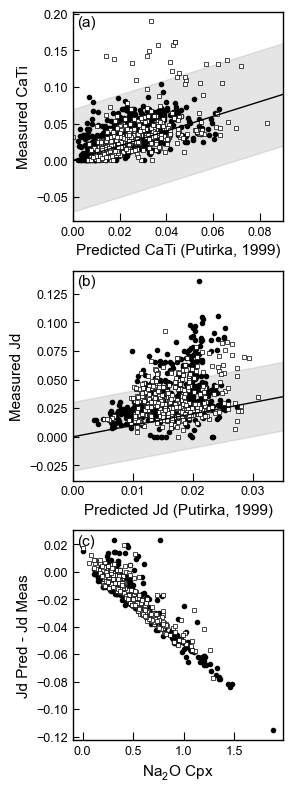

In [5]:
a=1
mew1=0.5
fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, figsize = (3,8))
ax1.plot(eq_tests_FeT['CaTi_Pred_Put1999'].loc[Press_new], 
         eq_tests_FeT['CaTi'].loc[Press_new], 'ok', ms=3)
ax1.plot(eq_tests_FeT['CaTi_Pred_Put1999'].loc[OldMask], 
         eq_tests_FeT['CaTi'].loc[OldMask], 'sk',  mfc='white',ms=2.5, mew=mew1)


ax1.set_xlabel('Predicted CaTi (Putirka, 1999)')
ax1.set_ylabel('Measured CaTi')
minx=0.0
maxx=0.1

ax1.plot([minx, maxx], [minx, maxx], '-k', linewidth=a)

ax1.fill_between([minx, maxx],[minx+0.07, maxx+0.07], [minx-0.07, maxx-0.07],
                 color='grey', alpha=0.2)


minx=0
maxx=0.1

ax2.plot(eq_tests_FeT['Jd_Pred_Put1999'].loc[Press_new], 
         eq_tests_FeT['Jd'].loc[Press_new],'ok', ms=3)
ax2.plot(eq_tests_FeT['Jd_Pred_Put1999'].loc[OldMask], 
         eq_tests_FeT['Jd'].loc[OldMask], 'sk',  mfc='white',ms=2.5, mew=mew1)



ax2.plot([minx, maxx], [minx, maxx], '-k', linewidth=a)

ax2.fill_between([minx, maxx],[minx+0.03, maxx+0.03], [minx-0.03, maxx-0.03],
                 color='grey', alpha=0.2)
ax1.annotate("(a)", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=11)
ax2.annotate("(b)", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=11)
ax3.annotate("(c)", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=11)



ax3.plot(eq_tests_FeT['Na2O_Cpx'].loc[Press_new],
         eq_tests_FeT['Jd_Pred_Put1999'].loc[Press_new]-eq_tests_FeT['Jd'].loc[Press_new],
         'ok', ms=3)
ax3.plot(eq_tests_FeT['Na2O_Cpx'].loc[OldMask],
         eq_tests_FeT['Jd_Pred_Put1999'].loc[OldMask]-eq_tests_FeT['Jd'].loc[OldMask],
         'sk',  mfc='white',ms=2.5, mew=mew1)
ax2.set_ylabel('Measured Jd')
ax2.set_xlabel('Predicted Jd (Putirka, 1999)')

ax3.set_ylabel('Jd Pred - Jd Meas')
ax3.set_xlabel('Na$_2$O Cpx')
ax1.set_xlim([0, 0.09])
ax2.set_xlim([0, 0.035])
fig.tight_layout()
fig.savefig('Cpx_LiqJdCaTi.png', dpi=300)